# AI核心技術概論II

郭耀仁 | <yaojenkuo@ntu.edu.tw> | 關務署 | 2024-04-15

## 深度學習簡介

## 資料科學、機器學習與深度學習

- 資料科學是一門涵蓋多個學科的領域，結合了數學、統計學和電腦科學，藉此針對大量資料進行分析，透過資料獲取有意義之資訊，進而對企業的營運、獲利產生助益。
- 機器學習是資料科學研究流程的其中一個環節：模型，經過訓練後建立一個能夠針對無標籤資料預測的函數。
- 深度學習是機器學習的一個子集合，是一種不需要使用者直接決定特徵的最適化方法，改由深度學習的結構間接決定。

## 資料科學的研究流程（循環、非線性）

- 資料載入。
- 資料清理。
- 資料轉換。
- 資料視覺化。
- 模型。
- 溝通。

## 機器學習的定義：三個要素、一個但書

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

來源：[Machine Learning, Tom Mitchell, McGraw Hill, 1997](http://www.cs.cmu.edu/~tom/mlbook.html)

## 傳統透過電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/3pojPXW.png?1)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定規則 $w$ 以及資料 $X$，我們就可以定義出函數 $f$ 生成答案 $y$

\begin{equation}
y = f(X;w) = Xw
\end{equation}

## 以機器學習的電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/YunyLd7.png)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定答案 $y$ 以及資料 $X$，機器學習的電腦程式在最小化損失函數 $J$ 的前提下生成規則 $w$，進而獲得預測 $\hat{y}$

\begin{equation}
\text{choose} \; w \in \{w^1, w^2, ..., w^n\} \\
\text{where} \; w \; \text{minimizes} \; J(w) \\
\text{subject to} \; \hat{y} = h(X; w) = Xw \\
\text{where} \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y} \\
\end{equation}

## 預測數值時最常見的損失函數 $J$

最小化均方誤差（Mean squared error）。

\begin{align}
\operatorname*{arg\,min}_w \;  J(w) =  \frac{1}{m} \sum_i^m (y_i - \hat{y_i})^2
\end{align}

## 預測類別時最常見的損失函數 $J$

最小化預測錯誤個數。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_i n(E_i) \\ \text{ where } E_i \; \text{represents the occurrence of } y_i \neq \hat{y_i}
\end{align}

## 機器學習的資料表達：特徵矩陣與目標陣列

- 外型 `(m, n)` 的特徵矩陣 $X$
- 外型 `(m,)` 的目標陣列 $y$

In [1]:
import matplotlib.pyplot as plt

def plot_X_y():
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.axis('equal')
    # Draw features matrix
    ax.vlines(range(6), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=0, xmax=5, lw=1)
    font_prop = dict(size=12, family='monospace')
    ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
    ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
    ax.text(-0.1, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    # Draw labels vector
    ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=8, xmax=9, lw=1)
    ax.text(7, -1, "Target Array ($y$)", size=14)
    ax.text(7.9, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    ax.set_ylim(10, -2)
    plt.show()

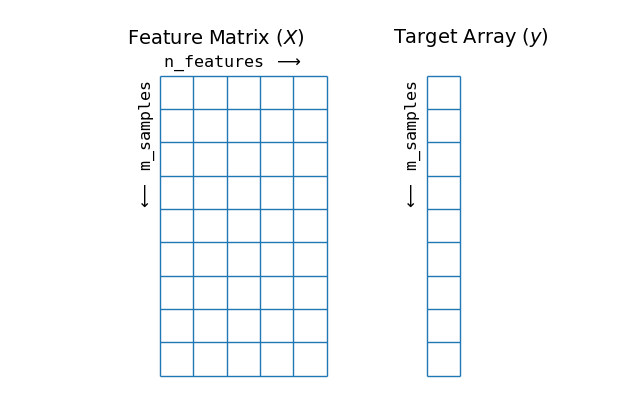

In [2]:
# 來源：<https://jakevdp.github.io/PythonDataScienceHandbook>
plot_X_y()

## 什麼是模型

- 模型（Model）是一個類似於「函數」的概念，由參數與運算組成。
- 模型的參數以及運算可以透過不同的方式生成，生成方式包含規則敘述與歷史資料訓練。
    - 透過規則敘述生成參數以及運算，稱為基於規則的模型（Rule-based model）或稱專家模型。
    - 透過歷史資料訓練生成參數以及運算，稱為基於演算法的模型（Algorithm-based model）或稱基於機器學習的模型。
- 不同模型除了相互比較，也可以與基準（Baseline）模型比較，常用來作為基準模型的像是基於隨機的黑猩猩模型或稱虛假模型（Dummy model），像是以投擲硬幣、骰子或者射飛鏢來決定模型的輸出。

## 可以採用哪種模型解決問題

- 採用基於規則的模型：
    - 問題能用人類語言描述邏輯、撰寫規則。
    - 答案不能容忍誤差。
- 採用基於機器學習的模型：
    - 問題非領域專家不容易描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。

## 可以採用哪種模型解決問題（續）

- 採用基於規則的模型：給定整數判斷它是否為奇數、偶數或者質數。
- 採用基於機器學習的模型：給定圖片判斷是貓或狗、給定房屋資訊預測房價。

## 基於機器學習的模型可再分為

- 監督式學習：訓練資料中具備已實現的數值或標籤。
    - 迴歸：數值預測的任務。
    - 分類：類別預測的任務。
- 非監督式學習：訓練資料中「不」具備已實現的數值或標籤。

## 數值預測的任務：迴歸模型

- 「數值預測」是「監督式學習」的其中一種應用類型。
- 預測的目標陣列 $y$ 屬於連續型數值變數。
- 更常被稱為「迴歸模型」。

## 類別預測的任務：分類器

- 「類別預測」是「監督式學習」的其中一種應用類型。
- 預測的目標陣列 $y$ 屬於離散型的類別變數。
- 更常被稱為「分類器」。

## 常見的機器學習模型

- k 最近鄰。
- 高斯單純貝氏分類器。
- 決策樹。

## 什麼是 k 最近鄰

- k 最近鄰（k-Nearest Neighbors, KNN）是一種基於資料之間的相似度來決定是否為同一類別的演算方法。
- 「歐幾里德距離 Euclidean distance」是最常用來量測資料相似度的指標，歐幾里德距離以白話文敘述其實就是直線距離。

\begin{align}
d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
\end{align}

## 什麼是 k 最近鄰（續）

- 更為泛用的距離量測是「明可夫斯基距離 Minkowski distance」。
- 當式子中的 $p=1$ 時就是曼哈頓距離、$p=2$ 時就是歐幾里德距離。

\begin{align}
d(x, y) = \left( \sum_{i=1}^{n} \mid x_i - y_i \mid ^p \right)^{\frac{1}{p}}
\end{align}

## 什麼是 k 最近鄰（續）

- k 最近鄰會根據預測資料點周遭的 k 個最相似訓練資料點決定分類結果，k 可以由使用者自行決定。
- 在二元分類的範疇下，k 會選擇一個奇數使得分類結果直接被決定。
- k 最近鄰模型的訓練與預測在同時間發生，也就是訓練在輸入預測資料時才發生，因此屬於 Lazy learning 的機器學習方法。

## 自行定義 k 最近鄰預測器

- 計算 `X_test_i` 與 `X_train` 的所有距離。
- 將計算好的距離與 `y_train` 同時排序。
- 依據 `k` 值選出前 `k` 小的標籤值。
- 從前 `k` 小的標籤值中挑選最多的標籤作為 `y_test_i`

## 什麼是高斯單純貝氏分類器

- 高斯單純貝氏分類器是基於貝氏定理的分類模型。
- 貝氏定理是在先驗機率（Prior probability）的基礎上，納入新事件的資訊來更新先驗機率，得到後驗機率（Posterior probability）的統計分法。

\begin{align}
P(y|x_i) = \frac{P(x_i|y) \times P(y)}{P(x_i)} \\
\text{posterior} = \frac{\text{likelihood} \times \text{prior}}{\text{evidence}}
\end{align}

## 什麼是高斯單純貝氏分類器（續）

- 高斯單純貝氏分類器中的「單純」指的是在計算分類機率時，會假設資料特徵不依賴類別，兩者彼此獨立。
- 因此實際在計算後驗機率的時候，只需要關注分子的部分。

\begin{align}
P(y|x_i) \propto P(x_i|y) P(y) \\
y^* = argmax_y \, P(x_i|y) P(y) \\
y^* = argmax_y \, P(y) \prod P(x_i|y)
\end{align}

## 什麼是高斯單純貝氏分類器（續）

當特徵為連續型變數時，可以藉由假設變數為常態分配的情況下，以樣本資料的平均數及標準差來計算機率（Likelihood），也就是 $P(x_i|y)$ 能以高斯機率密度函數計算。

\begin{align}
P(x_i | y) = \frac{1}{\sqrt{2 \pi \sigma_y^2}} exp \left( -\frac{(x_i - \mu_y)^2}{2 \sigma_y^2} \right)
\end{align}

## 什麼是高斯單純貝氏分類器（續）

當特徵數量很多的時候，$\prod P(x_i|y)$ 相乘所算出的機率值會非常小，造成後驗機率趨近於 0，這時可以透過取對數函數來避免。

\begin{align}
y^* = argmax_y \, log \left(P(y) \right) + \sum log \left( P(x_i|y) \right)
\end{align}

## 自行定義高斯單純貝氏分類器

- 依據 `y_train` 計算先驗機率 $P(y)$
- 依據 `X_train` 與 `y_train`的分類計算個別的摘要，包含平均數與變異數。
- 計算高斯機率密度 $P(x_i|y)$
- 計算後驗機率 $P(y|x_i)$
- 依據後驗機率預測 `y_test_i`

## 什麼是決策樹

- 決策樹（Decision tree）是一種利用外型像樹一樣的圖形決策模型，具有快速、可解釋性高的優點。
- 決策樹需要從資料中尋找合適的「特徵」與「切點」來進行樹的分支，多次分支後企圖讓資料有高差異性的分類。
- 例如決策是否要跑一場馬拉松：
    - 氣溫是否低於 15 度？
        - 否，不要跑。
        - 是。
            - 濕度是否低於 60%？
                - 否，不要跑。
                - 是，要跑。

## 什麼是決策樹（續）

建立一個決策樹模型必須要考量三個要素：

1. 要使用資料中的哪個變數作為特徵。
2. 要如何決定特徵的切點。
3. 何時要停止分支。

## 什麼是決策樹（續）

- 使用演算法計算資訊增益（Information Gain）、熵（Entropy）、資訊增益率（Information Gain Ratio）或吉尼不純度（Gini Impurity）來決定前述三要素。
- 因此建構決策樹的演算法可再分為：
    - ID3(Iterative Dichotomiser 3)
    - C4.5
    - C5.0
    - CART

## 自行定義決策樹

- 計算熵（Entropy）來量測不純度（Impurity）。
- 計算資訊增益（Information Gain）來決定特徵的切點。
- 由使用者決定何時停止分支。
- 使用決策樹對 `X_test_i` 進行預測。

## 前面的數值、類別預測任務我們都能建立基於規則的專家模型

- 有一些問題無法建立基於規則的專家模型，像是影像分類、語音識別或機器翻譯等，都屬於無法描述規則的任務。
- 對人類來說影像分類、語音識別或語言翻譯是很輕易能辦到的，但要寫出其中的規則、邏輯是極其困難的。
- 人類能夠輕易做到小規模，但是想大規模處理會曠日費時的任務，也適合指派給深度學習。

## 處理無法描述規則的任務

- 深度學習包含於機器學習之中，是機器學習集合的子集合。
- 深度學習使用連續且多層的數值轉換從訓練資料中同時進行特徵工程（Feature engineering）以及係數 $w$ 的最適化。
- 深度學習是一種不需要使用者**直接**決定特徵的最適化方法，而是由深度學習的結構**間接**決定。
- 當深度學習的層數愈多、單位愈多，意味著特徵工程的規模愈大。

## 訓練、驗證與測試

## 機器學習模型是基於最小化損失函數所建立

- 透過相同的損失函數評估表現。
- 差別在於究竟要比對哪一組目標陣列 $y$。

## 找尋係數向量的依據

基於最小化 $y^{(train)}$ 與 $\hat{y}^{(train)}$ 之間的誤差。

## 數值預測任務以均方誤差（Mean squared error, MSE）來表示

\begin{equation}
\operatorname*{arg\,min}_w \; \text{MSE}^{(train)} = \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - \hat{y_i}^{(train)})^2}
\end{equation}

## 類別預測任務是以誤分類數（Error）來表示

\begin{align}
\operatorname*{arg\,min}_w \; \text{Errors}^{(train)} = \sum_i n(E^{(train)}_i) \\ \text{ where } E^{(train)}_i \; \text{represents the occurrence of } y^{(train)}_i \neq \hat{y_i}^{(train)}
\end{align}

## 評估迴歸模型的表現同樣是比較預測目標陣列與實際目標陣列之間的誤差

但是改為驗證資料或測試資料的目標陣列。

\begin{equation}
\text{MSE}^{(valid)} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

## 評估分類器的表現評估以誤分類數衡量

但是改為驗證資料或測試資料的目標陣列。

\begin{align}
\text{Errors}^{(valid)} = \sum_i n(E^{(valid)}_i) \\ \text{ where } E^{(valid)}_i \; \text{represents the occurrence of } y^{(valid)}_i \neq \hat{y_i}^{(valid)}
\end{align}

## 關於訓練、驗證與測試

- 機器學習專案中的訓練、驗證來自具備已實現數值或標籤資料集。
- 測試則來自未實現數值或標籤資料集。
- 在從未見過的測試資料上之表現將決定它是否會被部署到正式環境開始運作。

## 現實世界中評估模型在測試資料上的表現不容易

- 時間與金錢成本上都比在驗證資料上實施來得高出許多。
- 像是設計類似實驗組與對照組的測試環境、等待一段時間才會實現數值或標籤。

## 評估指標的選擇

- 除了與任務種類相關，也與模型的應用場景有關。
- 例如即便同屬於疾病的檢測分類模型，針對傳染疾病或罕見疾病所選擇的指標就有可能不同。
- 這是由於和「誤分類」所衍生出的成本連動所致。

## 回歸模型表現的評估指標

- 均方誤差（Mean squared error）
- 平均絕對誤差（Mean absolute error）

## 平均絕對誤差（Mean absolute error）

- 平均絕對誤差和均方誤差相同之處在於他們都能精確捕捉預測失準的量值。
- 相異之處在於均方誤差對於預測失準較多的離群值（Outliers）具有放大的效果。
- 均方誤差適用於離群值會導致錯誤預測的成本更大幅度上升的應用場景。

## 分類器使用的評估指標比迴歸模型為多

- 準確率（Accuracy）
- 精確率（Precision）
- 召回率（Recall）
- F1-score
- ...等。

## 理解評估分類器指標的設計

拆解正確分類 $y^{(valid)} = \hat{y}^{(valid)}$ 與錯誤分類 $y^{(valid)} \neq \hat{y}^{(valid)}$ 的組成。

## 正確分類與錯誤分類各自都還能拆解成兩種情境

- 正確分類
    - 真陰性（True negative, TN）：$y^{(valid)}=0$ 並且 $\hat{y}^{(valid)}=0$
    - 真陽性（True positive, TP）：$y^{(valid)}=1$ 並且 $\hat{y}^{(valid)}=1$
- 錯誤分類
    - 偽陰性（False negative, FN）：$y^{(valid)}=1$ 並且 $\hat{y}^{(valid)}=0$
    - 偽陽性（False positive, FP）：$y^{(valid)}=0$ 並且 $\hat{y}^{(valid)}=1$

## 混淆矩陣（Confusion matrix）

以 $2 \times 2$ 矩陣表達正確、錯誤分類的情境。

||$\hat{y}^{(valid)}=0$|$\hat{y}^{(valid)}=1$|
|---|---|---|
|$y^{(valid)}=0$|真陰性（True negative, TN）|偽陽性（False positive, FP）|
|$y^{(valid)}=1$|偽陰性（False negative, FN）|真陽性（True positive, TP）|

## 評估指標可以從組成混淆矩陣的四個象限衍生而得

## 準確率（Accuracy）

是類別預測任務最常用的評估指標。

\begin{equation}
\text{Accuracy} = \frac{\text{TN} + \text{TP}}{\text{TN} + \text{TP} + \text{FN} + \text{FP}}
\end{equation}

## 準確率不適合評估分類器的場景

- 陽性事件發生率極低的應用場景，例如罕見疾病或市場黑天鵝事件的預測任務。
- 如果設計出一個樸素的分類器（Dummy classifier），它以目標向量中出現頻率最高的類別作為預測依據
- 以 1,000 個觀測值中僅有 1 個陽性的情況舉例，準確率可以達到 0.999，是一個乍看之下非常漂亮的表現。

## 樸素分類器對預測陽性事件發生完全無用處

這時使用精確率（Precision）與召回率（Recall）來進行評估會更加適合。

## 精確率

- 分子是真陽性、分母是真陽性加偽陽性。
- 它的意涵是分類器在所有預測為陽性的觀測值中，正確預測的觀測值數為多少。

\begin{align}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{align}

## 召回率

- 分子是真陽性、分母是真陽性加偽陰性。
- 它的意涵是分類器在所有陽性的觀測值中，正確預測的觀測值數為多少。

\begin{align}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{align}

## 精確率與召回率更專注評估分類器對陽性事件的預測能力

- 兩個指標愈高，代表模型的表現愈好。
- 精確率如果表現要好除了真陽性高，偽陽性亦要想辦法降低。
- 召回率如果表現要好除了真陽性高，偽陰性亦要想辦法降低。

## 如何選擇採用精確率或召回率

- 延伸探討偽陽性或偽陰性所衍生的誤分類成本。
- 採用精確率代表的要盡可能降低偽陽性，這表示的是偽陽性的成本高，意味著是誤判為陽性事件的成本高（例如誤診而進行高風險的手術）。
- 採用召回率代表的是要儘可能降低偽陰性，這表示的是偽陰性的成本高，意味著是誤判為陰性事件的成本高（例如誤診而導致超級傳播者沒有隔離而進入社區）。

## F-score

同時將精確率與召回率納入考量，運用一個係數 $\beta$ 加權兩個指標合成為一個指標。

\begin{equation}
F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}
\end{equation}

## $\beta$ 係數表示對精確率或召回率的相對重視程度

- 如果偽陽性的成本遠高於偽陰性的成本，代表百分百重視精確率，這時代入 $\beta = 0$，F-score 就會是精確率。
- 如果偽陰性的成本遠高於偽陽性的成本，代表百分百重視召回率，這時代入 $\beta = \infty$，F-score 就會是召回率。
- 如果偽陽性的成本和偽陰性的成本相當，代表兩個指標同等重要，這時代入 $\beta = 1$，F-score 就被稱為 F1-score，指標愈高，代表模型的表現愈好。

\begin{equation}
F_{1} = 2 \cdot \frac{precision \cdot recall}{precision + recall}
\end{equation}

## 誤差來源可以大抵分為

- 訓練誤差（Training error）
- 測試誤差（Testing error）

## 訓練與測試誤差

- 在已實現、具備目標值或標籤的訓練、驗證資料上表現良好，表示它的訓練誤差小。
- 在尚未實現、不具備目標值或標籤的測試資料上表現良好，表示它的測試誤差小（又稱為泛化能力強）。
- 不過在現實世界中，處於訓練與驗證階段時對於測試資料是一無所知的，如何在只能接觸到訓練與驗證資料時去降低測試誤差？

## 訓練、驗證與測試資料的 i.i.d. 假設

- 資料中每一筆觀測值彼此獨立（Independent）。
- 訓練、驗證與測試資料來自同樣分佈（Identically distributed）的母體。

## 機器學習演算方法的目標

1. 減少訓練誤差。
2. 減少訓練誤差與測試誤差的間距。

## 減少訓練誤差的具體做法

- 增加梯度遞減的訓練次數。
- 透過交叉驗證（Cross validation）的技巧消弭訓練與驗證資料切割所造成的誤差。
- 增加特徵矩陣的欄位。

## 減少訓練誤差與測試誤差的間距

引用正規化（Regularization）的技巧。

## 藉由增加梯度遞減的訓練次數減少訓練誤差的做法是直觀的

隨機初始化的 $w$ 的訓練誤差是高的，隨著訓練次數增加而漸漸減少。

## 交叉驗證

- 希望避免某個隨機狀態劃分出了不夠均勻的訓練和驗證資料。
- 將資料拆分為 `k` 個不重複的子集合，進而可以在這些子集合上重複進行訓練和驗證。
- 取平均值來評估誤差。

## 更多減少訓練誤差的方式

- 超參數（Hyperparameter）調校。
- 變換其他機器學習模型。
- 製造衍生變數（特徵工程）。
- ...等。

## 減少訓練誤差與測試誤差的間距

- 減少訓練誤差的過程，很有可能伴隨而來的是驗證或測試誤差的升高。
- 模型對於訓練資料過於熟悉，而降低了它的泛化能力。
- 這樣的狀態我們稱之為「過度配適」（Overfitting）。

## 梯度遞減

## 一種生成係數向量 $w$ 的演算方法

- 在機器學習、深度學習中更為廣泛使用的演算方法稱為「梯度遞減」（Gradient descent）。
- 基本概念是先隨機初始化一組係數向量，以迭代更新該組係數向量，一直到 $J(w)$ 收斂到局部最小值為止。

## 如何決定 `X` 與 `y` 之間的關聯 $w$

\begin{equation}
\text{choose} \; w \in \{w^1, w^2, ..., w^n\} \\
\text{where} \; w \; \text{minimizes} \; J(w) \\
\text{subject to} \; \hat{y} = h(X; w) = Xw \\
\text{where} \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y} \\
\end{equation}

## 為什麼採用梯度遞減

一種解法是正規方程（Normal equation）必須透過計算 $X^TX$ 的反矩陣 $(X^TX)^{-1}$ 求解 $w$

\begin{gather}
J(w) = \frac{1}{m} \parallel y - Xw \parallel^2 \\
\frac{\partial}{\partial w} J(w) = 0 \\
w = (X^TX)^{-1}X^Ty
\end{gather}

## 為什麼採用梯度遞減（續）

- `(n, n)` 反矩陣的計算複雜性最高是 $O(n^3)$，這意味著如果特徵個數變為 2 倍，計算 $(X^TX)^{-1}$ 的時間最多會變為 8 倍。
- 當特徵矩陣 `n` 很大（約莫是大於 $10^4$），正規方程的計算複雜性問題就會浮現，例如低解析度 $100 \: px \times 100 \: px$ 的灰階圖片。

## 梯度遞減如何「有方向性地」更新係數向量

- 梯度遞減並不是盲目亂槍打鳥地更新係數向量。
- 依據損失函數 $J(w)$ 關於係數向量 $w$ 的偏微分來決定更新的方向性。
- 更新幅度則由一個大於零、稱為「學習速率」的常數 $\alpha$ 決定。

![](../images/0002.png)

## 大海撈針的問題

- 給定電腦程式一組 $X^{(train)}$ 與 $y^{(train)}$
- 有無限多組的 $w$ 等著要嘗試。
- 「梯度遞減」演算方法就是為電腦程式提供了一個尋找解題的方式。

## 梯度遞減演算方法

將目前的 $w_0$ 減去學習速率 $\alpha$ 乘上 $J(w)$ 關於 $w_0$ 的偏微分、將目前的 $w_1$ 減去學習速率 $\alpha$ 乘上 $J(w)$ 關於 $w_1$ 的偏微分。

\begin{equation}
w_0 := w_0 - \alpha \frac{\partial J}{\partial w_0}
\end{equation}

\begin{equation}
w_1 := w_1 - \alpha \frac{\partial J}{\partial w_1}
\end{equation}

## 以係數向量的外觀表示

\begin{equation}
\text{for} \; \text{each} \; \text{epoch:} \\
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

## $J(w)$ 關於 $w$ 的偏微分就是演算方法中所謂的「梯度」（Gradient）

- 在迭代過程中 $w$ 更新的方向性取決於梯度正負號，如果梯度為正，$w$ 會向左更新（減小）；如果梯度為負，$w$ 會向右更新（增大）。
- 梯度（Gradient）與導數（Derivative）指的都是函數的偏微分，前者是描述函數對向量，後者是函數對純量。

\begin{equation}
\text{for} \; \text{each} \; \text{epoch:} \\
w := w - \alpha \frac{2}{m}X^T(\hat{y} - y)
\end{equation}

## 回顧梯度遞減的核心概念

\begin{equation}
\text{for} \; \text{each} \; \text{epoch:} \\
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

- $w$ 的更新依據有兩個：學習速率 $\alpha$ 與梯度 $\frac{\partial J}{\partial w}$
- 學習速率使用一個事先決定的常數。

## 不效率的最適化

- 使用固定的學習速率。
- 只考慮單下的梯度。
- 像是用同一套裝備與配速去面對距離不同的路跑賽事。

## 搭配兩種技法來增加效率

1. 特徵矩陣的標準化。
2. 進階的梯度遞減演算方法。

## 進階的梯度遞減

- 處於蓬勃發展的階段。
- 已經廣泛被資料科學家、機器學習工程師應用的有 Momentum、AdaGrad(Adaptive Gradient Descent)、RMSprop(Root mean square propagation)與 Adam(Adaptive moment estimation)。

## 從學習速率與梯度這兩方面著手調整

- 引進調適的學習速率（Adaptive methods），如果距離 $J(w)$ 低點遠就用大的學習速率、反之距離近就用小的學習速率
- 記錄從訓練開始的梯度量值，藉由過去已實現的梯度來判斷和 $J(w)$ 低點的相對位置，如果歷史梯度都很大，表示離低點遠，如果歷史梯度都很小，表示離低點近。

## 以 AdaGrad 為例，將原本梯度遞減的式子改寫

\begin{equation}
ssg = \sum^{t-1} (\frac{\partial J}{\partial w})^2
\end{equation}

\begin{equation}
w := w -\alpha \frac{1}{\epsilon + \sqrt{ssg}} \frac{\partial J}{\partial w}
\end{equation}

\begin{equation}
where \; \epsilon = 10^{-6}
\end{equation}

## 記錄歷史梯度的平方和來調適學習速率

- 當歷史梯度的平方和愈大，會調降學習速率。
- 當歷史梯度的平方和愈小，會調升學習速率。
- $\epsilon$ 會設定一個極小值（例如 `1e-06`）避免分母為零的情況發生。

## 在預測類別的前一步是預測機率

\begin{equation}
\hat{y} = 1, \quad \text{if} \: \hat{p}(y=1|X; w) \geq \hat{p}(y=0|X; w) \\
\hat{y} = 0, \quad \text{if} \: \hat{p}(y=1|X; w) < \hat{p}(y=0|X; w)
\end{equation}

## 承先啟後的橋樑

- 羅吉斯迴歸（Logistic Regression）分類器能夠協助我們由數值預測過渡至類別預測的任務。
- 羅吉斯迴歸（Logistic Regression）分類器能夠協助我們理解深度學習的基礎理論。
- 欲得到類別預測 $\hat{y}$ 必須先得到類別預測機率 $\hat{p}$。

## Sigmoid 函數

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{p} = \sigma(Xw) = \frac{1}{1 + e^{-Xw}}
\end{equation}

In [3]:
import numpy as np

def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

In [4]:
def plot_sigmoid():
    x = np.linspace(-6, 6, 100)
    y = sigmoid(x)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, y)
    ax.axvline(0, color = 'black')
    ax.axhline(y = 0, ls = ':', color = 'k', alpha = 0.5)
    ax.axhline(y = 0.5, ls = ':', color = 'k', alpha = 0.5)
    ax.axhline(y = 1, ls = ':', color = 'k', alpha = 0.5)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_ylim(-0.1, 1.1)
    ax.set_title("Sigmoid function")
    plt.show()

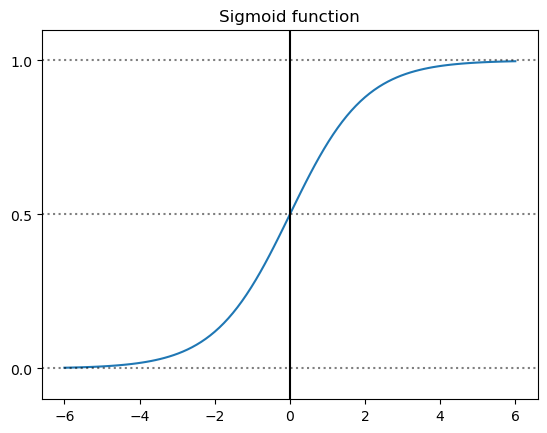

In [5]:
plot_sigmoid()

## 將迴歸模型的輸出 $Xw$ 映射至 $[0, 1]$ 之間就能獲得 $\hat{p}$

- 依據門檻值獲得 $\hat{y}$
- 此處門檻值以常見的 50% 表示。

\begin{equation}
\hat{y} = 1, \quad \text{if} \: \hat{p} \geq 0.5 \\
\hat{y} = 0, \quad \text{if} \: \hat{p} < 0.5
\end{equation}

## 將門檻值比較表示為階躍函式（Step function）

\begin{align}
\hat{y} &= h(X; w) \\
&= \chi(\sigma(Xw))
\end{align}

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\chi(z) = 1, \quad \text{if} \: z \geq 0.5 \\
\chi(z) = 0, \quad \text{if} \: z < 0.5
\end{equation}

## 定義評估

評估 $h$ 的方法是計算 $\hat{y}^{(train)}$ 與 $y^{(train)}$ 之間的誤分類數，誤分類數愈低，分類器的表現愈好。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_i n(E_i) \\ \text{ where } E_i \; \text{represents the occurrence of } y_i \neq \hat{y_i}
\end{align}

## 使用交叉熵（Cross-entropy）作為損失函數 $J(w)$

為了書寫方便，我們省略訓練資料的註記$(train)$。

\begin{equation}
J(w) = -\frac{1}{m}log(\sigma(Xw)), \quad \text{if} \: y = 1 \\
J(w) = -\frac{1}{m}log(1-\sigma(Xw)), \quad \text{if} \: y = 0
\end{equation}

## 交叉熵巧妙之處：讓誤分類的損失趨近無限大

- 當真實的類別 $y$ 為 1，$\sigma(Xw)$ 若離 0 比較近，預測為類別 0 的機率較高。
- 當真實的類別 $y$ 為 0，$\sigma(Xw)$ 若離 1 比較近，預測為類別 1 的機率較高。

In [6]:
def plot_cross_entropy():
    epsilon = 1e-5
    h = np.linspace(epsilon, 1-epsilon) # 利用微小值 epsilon 避免 log(0) 的錯誤
    y1 = -np.log(h)
    y2 = -np.log(1 - h)
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))
    ax[0].plot(h, y1)
    ax[0].set_title("$y=1$\n$-\log(\sigma(Xw))$")
    ax[0].set_xticks([0, 1])
    ax[0].set_xticklabels([0, 1])
    ax[0].set_xlabel("$\sigma(Xw)$")
    ax[1].plot(h, y2)
    ax[1].set_title("$y=0$\n$-\log(1-\sigma(Xw))$")
    ax[1].set_xticks([0, 1])
    ax[1].set_xticklabels([0, 1])
    ax[1].set_xlabel("$\sigma(Xw)$")
    plt.tight_layout()
    plt.show()

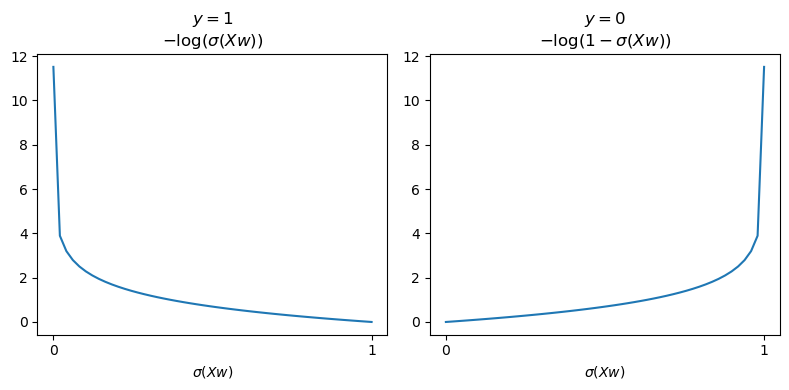

In [7]:
plot_cross_entropy()

## 將 $y$ 與 $1-y$ 加入 $J(w)$ 把兩個情境（$y=0$ 或 $y=1$）合而為一

當 $y=1$ 時，$J(w)$ 只剩下前項；當 $y=0$ 時，$J(w)$ 只剩下後項。

\begin{equation}
J(w) = \frac{1}{m}(-ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw)))
\end{equation}

## 運用梯度遞減找到係數向量 $w^*$

\begin{equation}
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

## 求解 $J(w)$ 關於 $w$ 的偏微分得具備三個先修知識

1. 連鎖法則（Chain rule）。
2. $e^{x}$ 關於 $x$ 的微分。
3. $log(x)$ 關於 $x$ 的微分。

## $J(w)$ 是一個由多個不同函數複合而成的損失函數

- 先是 Sigmoid 函數 $\sigma$
- 再來是 $log$ 函數。
- 欲求解複合函式偏微分得仰賴連鎖法則。

\begin{align}
(f\circ g)(x) &= f(g(x)) \\
(f\circ g)'(x) &= f'(g(x))g'(x)
\end{align}

## $e^{x}$ 關於 $x$ 的微分

\begin{equation}
\frac{d}{dx}e^{x} = e^{x}
\end{equation}

## $log(x)$ 關於 $x$ 的微分

\begin{equation}
\frac{d}{dx}log(x) = \frac{1}{x}
\end{equation}

## 推導 $J(w)$ 關於 $w$ 的偏微分

\begin{align}
\frac{\partial}{\partial w}J &= \frac{\partial}{\partial w} (-ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw))) \\
&= -y\frac{\partial}{\partial w}log(\sigma(Xw)) - (1-y)\frac{\partial}{\partial w}(log(1-\sigma(Xw)))
\end{align}

## 首先計算 $log(\sigma(Xw))$ 關於 $w$ 的微分

\begin{align}
\frac{\partial}{\partial w}log(\sigma(Xw)) &= \frac{\partial}{\partial w}log(\sigma(Xw)) \cdot \frac{\partial}{\partial w}(\sigma(Xw)) \\
&= \frac{1}{\sigma(Xw)} \cdot \sigma'(Xw) \cdot \frac{\partial}{\partial w}Xw \\
&= \frac{1}{\sigma(Xw)} \cdot \sigma'(Xw) \cdot X
\end{align}

## 再計算 $log(1-\sigma(Xw))$ 關於 $w$ 的微分

\begin{align}
\frac{\partial}{\partial w}log(1-\sigma(Xw)) &= \frac{\partial}{\partial w}log(1-\sigma(Xw)) \cdot \frac{\partial}{\partial w}(1-\sigma(Xw)) \\
&=\frac{1}{1-\sigma(Xw)} \cdot (-\sigma'(Xw) \cdot \frac{\partial}{\partial w}Xw) \\
&=\frac{1}{1-\sigma(Xw)} \cdot (-\sigma'(Xw) \cdot X)
\end{align}

## 兩個部分都得先計算 $\sigma'(Xw)$ 也就是 Sigmoid 函數關於 $w$ 的微分，才能繼續推導

\begin{align}
\sigma'(Xw) &= \frac{\partial}{\partial w} \frac{1}{1 + e^{-Xw}} = \frac{\partial}{\partial w} (1 + e^{-Xw})^{-1} \\
&= \frac{-\frac{\partial}{\partial w}(1 + e^{-Xw})}{(1 + e^{-Xw})^2}
\end{align}

## 分子部分我們先推導 $e^{-x}$ 關於 $x$ 的微分

\begin{equation}
\frac{d}{dx}e^{-x} = \frac{d}{dx}\frac{1}{e^x} = \frac{-\frac{d}{dx} e^x}{(e^x)^2} = \frac{-e^x}{(e^x)^2} = \frac{-1}{e^x} = -e^{-x}
\end{equation}

## 於是 $\sigma'(Xw)$ 可以寫成

\begin{align}
\sigma'(Xw) &= \frac{-\frac{\partial}{\partial w}e^{-Xw}}{(1 + e^{-Xw})^2} = \frac{e^{-Xw}}{(1 + e^{-Xw})^2} \\
&= \frac{e^{-Xw}}{(1 + e^{-Xw}) \cdot (1 + e^{-Xw})}
\end{align}

## 這裡的推導有些狡猾，需要在分子設計一個 `+1-1`

\begin{align}
\sigma'(Xw) &= \frac{e^{-Xw}}{(1 + e^{-Xw}) \cdot (1 + e^{-Xw})} \\
&= \frac{1}{1 + e^{-Xw}} \cdot \frac{e^{-Xw} + 1 - 1}{1 + e^{-Xw}} = \frac{1}{1 + e^{-Xw}} \cdot ( \frac{1 + e^{-Xw}}{1 + e^{-Xw}} - \frac{1}{1 + e^{-Xw}}) \\
&=\frac{1}{1 + e^{-Xw}} \cdot ( 1 - \frac{1}{1 + e^{-Xw}}) \\
&=\sigma(Xw)(1-\sigma(Xw))
\end{align}

## 推導出 $\sigma'(Xw)$，再回去計算未完的兩個部分

\begin{align}
\frac{\partial}{\partial w}log(\sigma(Xw)) &= \frac{1}{\sigma(Xw)} \cdot \sigma'(Xw) \cdot X \\
&= \frac{1}{\sigma(Xw)}\sigma(Xw)(1-\sigma(Xw))X \\
&= (1-\sigma(Xw))X
\end{align}

\begin{align}
\frac{\partial}{\partial w}log(1-\sigma(Xw)) &= \frac{1}{1-\sigma(Xw)} \cdot (-\sigma'(Xw)) \cdot X\\
&=\frac{1}{1-\sigma(Xw)}(-(\sigma(Xw)(1-\sigma(Xw)))X) \\
&=-\sigma(Xw)X
\end{align}

## 最後回到 $J(w)$ 關於 $w$ 的偏微分

\begin{align}
\frac{\partial J}{\partial w} &= \frac{1}{m}(-y(1-\sigma(Xw))X - (1-y)(-\sigma(Xw)X)) \\
&=\frac{1}{m}(-X^Ty + y\sigma(Xw)X + X^T\sigma(Xw) - y\sigma(Xw)X) \\
&=\frac{1}{m}(-X^Ty + X^T\sigma(Xw)) \\
&=\frac{1}{m}(X^T(\sigma(Xw) - y))
\end{align}

## 梯度推導完畢

在迭代過程中 $w$ 更新的方向性取決於梯度正負號，如果梯度為正，$w$ 會向左更新（減小）；如果梯度為負，$w$ 會向右更新（增大）。

\begin{equation}
w := w - \alpha \frac{1}{m}(X^T(\sigma(Xw) - y)) \\
w := w - \alpha \frac{1}{m}(X^T(\sigma(\hat{y}) - y))
\end{equation}

## 正規化（Regularization）

- 讓機器學習模型在保留多個變數、減少訓練誤差的前提下，避免產生過度配適。
- 使用一個參數 $\lambda$ 在訓練過程中對係數向量壓抑。

## 以數值預測任務為例，在原本的誤差函式 $J(w)$ 加上 $\lambda w^Tw$ 抑制係數向量，又被稱為 L2 正規化

\begin{equation}
J(w) = \frac{1}{m}(\parallel Xw - y \parallel^2 + \lambda w^Tw)
\end{equation}

## 具備 L2 正規化效果梯度遞減的式子

\begin{gather}
w := w - \alpha \frac{2}{m}(X^T(\hat{y} - y) + \lambda w)) \\
w := (w - \alpha \frac{2}{m}\lambda w) - \alpha\frac{2}{m}X^T(\hat{y} - y) \\
w := w(1 - \alpha \frac{2}{m}\lambda) - \alpha\frac{2}{m}X^T(\hat{y} - y)
\end{gather}

## 由使用者決定的參數

- 當 $\lambda = 0$ 時代表不抑制係數向量，沒有正規化效果。
- 較大的 $\lambda$ 會壓抑最適化係數向量的選擇，正規化效果大，藉此在配適不足與過度配適之間進行平衡。
- 當正規化效果過大時，模型又會變得與配適不足的狀態相近。

## 在類別預測任務於損失函數 $J(w)$ 也能夠加上 $\lambda w^Tw$ 抑制係數向量

\begin{equation}
J(w) = \frac{1}{m}(-ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw)) + \lambda w^Tw)
\end{equation}

## 求解梯度 $J(w)$ 關於 $w$ 的偏微分

\begin{align}
\frac{\partial J}{\partial w} &= \frac{1}{m}(-y(1-\sigma(Xw))X - (1-y)(-\sigma(Xw)X) + 2\lambda w) \\
&=\frac{1}{m}(-X^Ty + y\sigma(Xw)X + X^T\sigma(Xw) - y\sigma(Xw)X + 2\lambda w) \\
&=\frac{1}{m}(-X^Ty + X^T\sigma(Xw) + 2\lambda w) \\
&=\frac{1}{m}(X^T(\sigma(Xw) - y) + 2\lambda w) \\
&=\frac{1}{m}(X^T(\sigma(Xw) - y) + \frac{1}{C}w) \text{, where } C=\frac{1}{2\lambda}
\end{align}

## 寫出具備 L2 正規化效果梯度遞減的式子

\begin{gather}
w := w - \alpha \frac{1}{m}(X^T(\sigma(Xw) - y) + \frac{1}{C}w) \text{, where } C=\frac{1}{2\lambda} \\
w := w - \alpha \frac{1}{mC}w - \alpha \frac{1}{m}(X^T(\sigma(Xw) - y)) \\
w := w(1 - \alpha \frac{1}{mC}) - \alpha \frac{1}{m}(X^T(\sigma(Xw) - y))
\end{gather}

## 前向傳播

## 深度學習的層數與單位

- 使用者除了以層數定義結構決定特徵工程的規模，也需要決定每個層數的單位數量。
- 單位是由「感知器」（Perceptron），有的時候也被稱呼為「神經元」（Neuron）演變而來，感知器概念由 Frank Rosenblatt 於 1957 年提出，是深度學習模型的雛型，它是一種具有門檻值（Threshlod）的線性單位，由特徵 $x$、係數 $w$ 、誤差 $b$ 與階躍函式 $\chi$ 組合而成。

\begin{equation}
\hat{y} = \chi(x^Tw + b)
\end{equation}

## 感知器階躍函數 $\chi$

\begin{equation}
\chi(z) = 0, \quad \text{if} \: z < 0
\end{equation}

\begin{equation}
\chi(z) = 1, \quad \text{if} \: z \geq 0
\end{equation}

## 感知器與羅吉斯迴歸有異曲同工之妙

- 差別在於羅吉斯迴歸多了 Sigmoid 函數的轉換才輸入階躍函數，感知器則沒有這一道手續。
- 事實上，感知器概念之所以未能發揚光大，就是缺乏能將線性輸入 $w^Tx$ 轉換為非線性的啟動函數（Activation function），因此不論添加多少感知器，依舊只能解決線性的數值、類別預測任務。

## 深度學習模型常使用的啟動函數

- Sigmoid 函數。
- ReLU 函數。
- tanh 函數。
- ...等微分式「漂亮」的非線性函數。

## 鏈結函數的關係

- 現代的基礎深度學習模型可以透過充滿單位的層數堆疊而成，每層的多個單位會因為目的性而有不同的相連狀態。
- 基本的是把結構中某一層的所有單位都與前一層以及後一層的所有單位相連，稱為完全連接層（Fully-connected layers）或密集層（Dense layers）。
- 深度學習模型的目標與先前在數值預測、類別預測任務中所介紹的迴歸模型和羅吉思迴歸分類器一致：利用 $h$ 來逼近某個函式 $f$，但由於深度學習模型具備了層數的結構，需要近似的函式 $h$ 也成為了有鏈結的關係。

\begin{align}
\hat{y} &= h(X; W, B) \\
&= h^{(n)}(...h^{(2)}(h^{(1)}(X; W^{(1)}, B^{(1)})))
\end{align}

## 輸入層、輸出層與隱藏層

- 其中 $h^{(1)}$ 稱為「輸入層」（Input layer），$ h^{(n)}$ 稱為「輸出層」（Output layer），介於這兩層之間的 $h^{(i)}$ 則稱為「隱藏層」（Hidden layer）。
- 深度學習模型與傳統機器學習模型最大的差別，就在於是否有隱藏層的存在，意即一個最基本、最淺的深度學習模型至少具有三層。

## 反向傳播

## 深度學習最適化的大同小異

- 隱藏層造就了尋找深度學習模型最適的 $W$ 與 $B$ 時，需要採用「反向傳播」（Backpropagation）的演算方法
- 隱藏層的存在，導致了 $\hat{y}$ 與 $y$ 之間的誤差僅能回饋到前一個隱藏層與輸出層之間的 $W$ 與 $B$ 作為更新依據，更前段層數之間 $W$ 與 $B$ 的更新依據，則改由後段層數回饋。
- 簡言之，我們可以將反向傳播類比為專門設計給深度學習模型的梯度遞減演算方法。

## 一個最基礎的深度學習模型

會有輸入層、隱藏層與輸出層至少三層的深度，透過各層之間的單位相連接，可以得到由權重矩陣 $W$ 與誤差矩陣 $B$ 所組成的係數，這組係數經過訓練之後，可以將輸入的特徵矩陣 $X$ 映射為目標矩陣 $\hat{Y}$。每層都是由啟動函數、前一層的輸出、當層的權重矩陣與誤差矩陣結合，然後成為下一層的輸入。

\begin{align}
Z^{(1)} &= W^{(1)}A^{(0)} + B^{(1)} = W^{(1)}X^{T} + B^{(1)} \\
A^{(1)} &= \sigma(Z^{(1)}) \\
Z^{(2)} &= W^{(2)}A^{(1)} + B^{(2)} \\
A^{(2)} &= \sigma(Z^{(2)}) = \hat{Y}
\end{align}

## 數值預測的任務，使用均方誤差評估

深度學習模型完成一次前向傳播，特徵矩陣 $X$ 就會依賴當下的權重矩陣 $W^{(i)}$ 和誤差矩陣 $B^{(i)}$ 跟隨著結構由輸入層、隱藏層移動到輸出層成為 $\hat{y}$，這時就能夠計算 $y$ 與 $\hat{y}$ 之間的誤差量值。

\begin{align}
J(W, N) &= \frac{1}{m}\parallel Y - \hat{Y} \parallel^2 \\
&= \frac{1}{m}\parallel Y - h(X; W, B) \parallel^2
\end{align}

## 類別預測的任務，使用交叉熵評估

\begin{align}
J(W, B) &= \frac{1}{m}(-Ylog(\hat{Y}) - (1-Y)log(1-\hat{Y})) \\
&= \frac{1}{m}(-Ylog(h(X; W, B)) - (1-Y)log(1-h(X; W, B)))
\end{align}

## 深度學習模型的訓練

接下來模型可以分別計算誤差函式 $J(W, B)$ 關於各層中的權重矩陣與誤差矩陣之偏微分，並且返回各層決定該如何更新權重矩陣與誤差矩陣，目標在下一次前向傳播結束之後能夠讓誤差下降，這樣的技巧稱為「反向傳播」（Backpropagation），是一種專門使用在深度學習模型中的梯度遞減演算方法，$\alpha$ 同樣用來標註學習速率。

\begin{align}
W^{(i)} := W^{(i)} - \alpha \frac{\partial J(W, B)}{\partial W^{(i)}} \\
B^{(i)} := B^{(i)} - \alpha \frac{\partial J(W, B)}{\partial B^{(i)}}
\end{align}

## 深度學習模型的訓練（續）

我們可以應用連鎖法則（Chain rule）求解它關於各層中的權重矩陣與誤差向量之偏微分，以一個具有三層結構的深度學習模型為例，反向傳播會先更新「隱藏至輸出」階段中的 $W^{(1)}$ 以及 $B^{(1)}$。

\begin{align}
\frac{\partial J}{\partial W^{(1)}} = \frac{\partial J}{\partial A^{(1)}} \frac{\partial A^{(1)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial W^{(1)}} \\
\frac{\partial J}{\partial B^{(1)}} = \frac{\partial J}{\partial A^{(1)}} \frac{\partial A^{(1)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial B^{(1)}}
\end{align}

## 深度學習模型的訓練（續）

再返回更新「輸入至隱藏」階段中的 $W^{(0)}$ 以及 $B^{(0)}$。

\begin{align}
\frac{\partial J}{\partial W^{(0)}} = \frac{\partial J}{\partial A^{(1)}} \frac{\partial A^{(1)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial A^{(0)}} \frac{\partial A^{(0)}}{\partial Z^{(0)}} \frac{\partial Z^{(0)}}{\partial W^{(0)}} \\
\frac{\partial J}{\partial B^{(0)}} = \frac{\partial J}{\partial A^{(1)}} \frac{\partial A^{(1)}}{\partial Z^{(1)}} \frac{\partial Z^{(1)}}{\partial A^{(0)}} \frac{\partial A^{(0)}}{\partial Z^{(0)}} \frac{\partial Z^{(0)}}{\partial B^{(0)}}
\end{align}

## 深度學習模型的泛化訓練式

寫成一個泛化的式子來定義在單層的反向傳播需要求解哪些偏微分的項目，這裡我們改使用 $J^{(i)}$ 表示單層的輸出，在「輸入至隱藏」或「隱藏至隱藏」階段，可以想像只是部分的誤差。

\begin{equation}
\frac{\partial J^{(i)}}{\partial W^{(i)}} = \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial W^{(i)}}
\end{equation}

\begin{equation}
\frac{\partial J^{(i)}}{\partial B^{(i)}} = \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial B^{(i)}}
\end{equation}

## 反向傳播的必要性

- 由於在更新「輸入至隱藏」階段中的 $W^{(0)}$ 以及$B^{(0)}$，必須倚賴「隱藏至輸出」階段中的 $A^{(1)}$ 以及 $Z^{(1)}$，意即第 $i$ 層的權重矩陣和誤差矩陣的更新是依據第 $i+1$ 層的輸出。
- 最後我們需要推導在 $J(W, B)$ 關於輸出層的權重矩陣與誤差向量之偏微分，經由連鎖法則展開的偏微分各別為何。

## 反向傳播的求解項目

首先計算「輸出至隱藏」階段的 $\frac{\partial J}{\partial \hat{Y}}$

\begin{align}
\frac{\partial J}{\partial \hat{Y}} &= \frac{\partial}{\partial \hat{Y}}(\frac{1}{m} (-Ylog(\hat{Y}) - (1 - Y)log(1 - \hat{Y}))) \\
&= \frac{1}{m}(-Y\frac{1}{\hat{Y}} - (1 - Y)\frac{1}{1 - \hat{Y}}(-1)) \\
&= \frac{1}{m}(-\frac{Y}{\hat{Y}} + \frac{1-Y}{1 - \hat{Y}}) \\
&= -\frac{1}{m}(\frac{Y}{\hat{Y}} - \frac{1-Y}{1 - \hat{Y}}) \\
\end{align}

## 反向傳播的求解項目（續）

最後是在單層反向傳播需要求解的偏微分項目。

\begin{align}
\frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} &= \frac{\partial J^{(i)}}{\partial A^{(i)}} \sigma'(Z^{(i)}) = dZ^{(i)} \\
\frac{\partial J^{(i)}}{\partial W^{(i)}} &= \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial W^{(i)}} = dZ^{(i)}A^{(i-1)} \\
\frac{\partial J^{(i)}}{\partial B^{(i)}} &= \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial B^{(i)}} = dZ^{(i)} \\
\frac{\partial J^{(i)}}{\partial A^{(i-1)}} &= \frac{\partial J^{(i)}}{\partial A^{(i)}} \frac{\partial A^{(i)}}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial A^{(i-1)}} = dZ^{(i)} W^{(i)}
\end{align}

## 如何安排深度學習模型的結構

- 依據特徵矩陣 $X$ 的外型安排輸入層。
- 依據目標陣列 $y$ 的外型安排輸出層。
- 依據既有相關模型的結構安排隱藏層。
- 選擇評估指標與損失函數。
- 開始訓練，每個訓練迭代過程都會包含一次前向傳播與反向傳播。
- 結束訓練，檢視評估指標。

## 如何安排深度學習模型的結構：以 [Titanic](https://www.kaggle.com/competitions/titanic) 為例

```python
features = ["Sex", "Fare", "Pclass", "Age"]
model = tf.keras.Sequential([
    tf.keras.layers.Input(4), # len(features)
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid") # probability
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["binary_accuracy"]
)
```

## 如何安排深度學習模型的結構：以 [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) 為例

```python
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
model = Sequential([
    tf.keras.layers.Input((28, 28, 1)), # single picture
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax") # len(classes)
])
model.compile(optimizer="adam",
              loss="categorical_crossentropy"
              metrics=['accuracy'])
```

## 深度學習遊樂場

## 體驗深度學習

- TensorFlow Playground: <https://playground.tensorflow.org>
- Quick Draw!: <https://quickdraw.withgoogle.com>
- Word2viz: <https://lamyiowce.github.io/word2viz>

## 實作深度學習

- Titanic: <https://www.kaggle.com/competitions/titanic>
- Spaceship Titanic: <https://www.kaggle.com/competitions/spaceship-titanic>
- Dogs vs. Cats: <https://www.kaggle.com/competitions/dogs-vs-cats>
- Fashion MNIST: <https://www.kaggle.com/datasets/zalando-research/fashionmnist>
- I’m Something of a Painter Myself: <https://www.kaggle.com/competitions/gan-getting-started>
- Open AI Gymnasium: <https://gymnasium.farama.org>

## 實作深度學習（續）

- PyTorch: <https://pytorch.org>
- Keras: <https://keras.io>
- Hugging Face: <https://huggingface.co>